# 🕰️ Time Series Analysis: Airline Passengers Dataset 🛫
Time Series Analysis delves into understanding sequences of data points ordered in time, typically at equally spaced intervals. The Airline Passengers dataset is a classic example that displays the monthly totals of international airline passengers from 1949 to 1960.

# 📚 Libraries:
Before diving in, let's set up our environment by importing the essential libraries for data manipulation, visualization, and time series analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# 📦 Loading the Dataset:
The dataset captures the monthly footfall of passengers over several years, which is a great representative of both trend and seasonality in time series data.

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df_airline = pd.read_csv(url, parse_dates=['Month'], index_col='Month')



In [5]:
df_airline.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df_airline.shape

(144, 1)

# 🕵️‍♂️ Exploratory Data Analysis (EDA) & 🎨 Visualization:
# 📈 Basic Time Series Plot:
Visual representation is the first step in understanding any time series data. The plot can highlight obvious trends, seasonality, or irregularities.

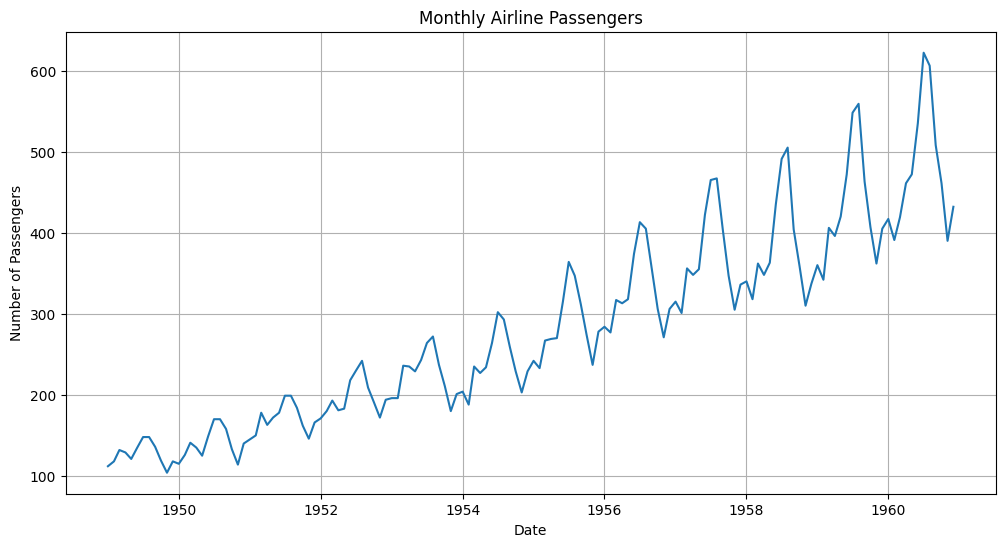

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_airline)
plt.title('Monthly Airline Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.grid(True)
plt.show()


# 🔍 Seasonal Decomposition:
Decomposition provides a structured way of breaking the time series into its components, which are typically trend, seasonality, and residuals. This aids in understanding underlying patterns.

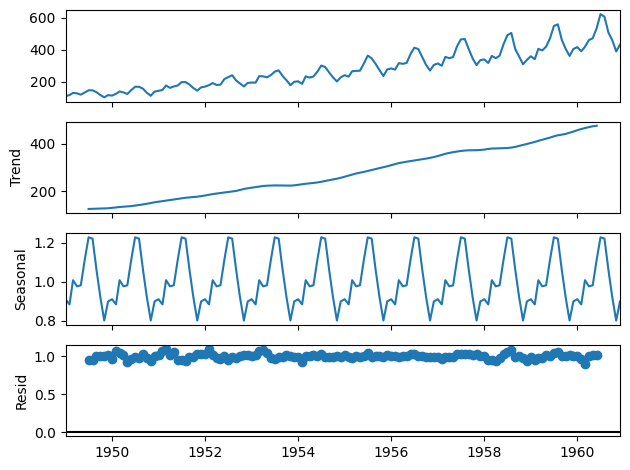

In [8]:
decomposition = seasonal_decompose(df_airline, model='multiplicative')
fig = decomposition.plot()
plt.show()


# 📜 Rolling Statistics:
Rolling statistics provide a moving window view of the data, which can help in understanding local patterns and smoothing out short-term fluctuations.

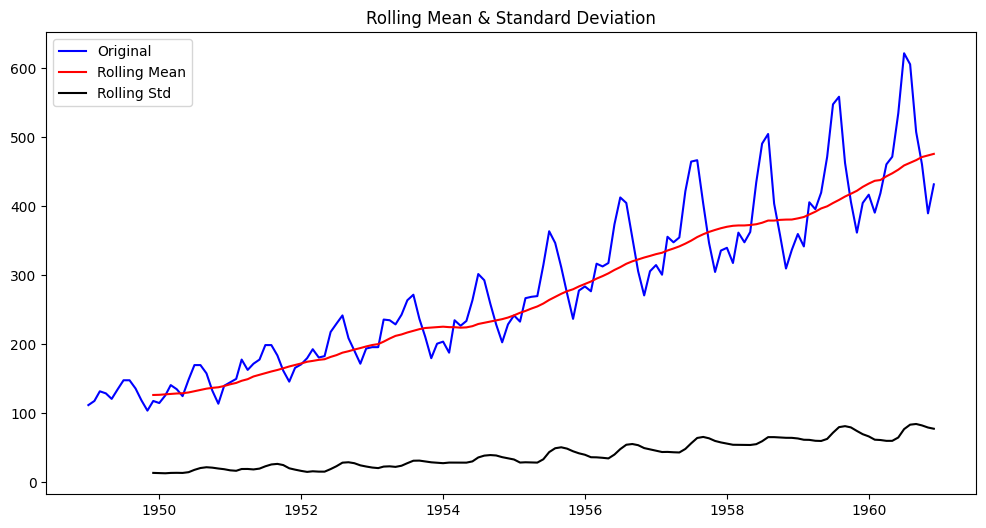

In [9]:
rolling_mean = df_airline.rolling(window=12).mean()
rolling_std = df_airline.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df_airline, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


# 🤓 Stationarity Check:
For many time series models, stationarity is a crucial property. A stationary series has constant mean, variance, and autocorrelation over time. The Dickey-Fuller test can help determine stationarity.

In [10]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

adf_test(df_airline['Passengers'])


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# The Airline Passengers dataset provides invaluable insights into the intricacies of time series data. The above steps pave the way for preprocessing the data, ensuring stationarity, and eventually forecasting using models like ARIMA or Prophet.